# Loading into DataFrames

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
t = pd.read_csv("train.csv", chunksize=100)


In [183]:
[sum(i.Survived) for i in t]

[41, 28, 39, 49, 36, 43, 35, 37, 34]

In [184]:
{1,1,2}

{1, 2}

In [189]:
a = [3,2,1]
a.sort()
a

[1, 2, 3]

In [187]:
(1,2,3).sort()

AttributeError: 'tuple' object has no attribute 'sort'

In [ ]:
x = [[1,2], [3,4], [5,6]]
(max(i) for i in x)

# Basic Exploration 

In [155]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [156]:
train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [157]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None



# Missing Values

There are 891 one total rows.

Age, Cabin, Embarked have missing values.

* Age: 714 out of 891 not missing
* Cabin: 204 out of 891 not missing
* Embarked: 889 out of 891

* are missing values from any group in particular

# Clean

* Clean Embarked column
* Clean Cabin Column
* Clean Name Column


# Next Steps

1. Investigate how each feature correlates to survival
2. Clean appropriately 
3. Make observation 
4. Make decision based on observation 


* Age -- **Note: Some missing values** Also could create age brackets
* Gender
* pclass 
* name --**extract title from name**
* Fare --**could create fare brackets**
* sibsp --**could use this to work out how many family members were on board**
* parch
* embarked --**not fully complete**
* cabin --**drop because very incomplete**
* PassengerID --**drop because it does not contribute to survival**


# Age

drop NaN values

distribution of ages for survived and not survied

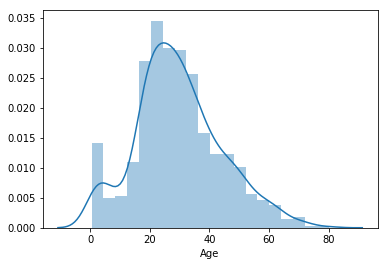

In [159]:
#train.dropna(axis=['Age'], how=['any'])
#train_drop=train.dropna(axis=['Age'])
sns.distplot(train.Age.dropna())           #distplot dosnt like missing values NaN

In [162]:
train.Age.dropna().head()  #here we are manipulating a series 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [179]:
survived.Survived.astype(float)

1      1.0
3      1.0
10     1.0
11     1.0
21     1.0
23     1.0
52     1.0
66     1.0
88     1.0
97     1.0
123    1.0
136    1.0
151    1.0
183    1.0
193    1.0
194    1.0
195    1.0
209    1.0
215    1.0
218    1.0
224    1.0
230    1.0
248    1.0
257    1.0
268    1.0
269    1.0
275    1.0
291    1.0
299    1.0
305    1.0
      ... 
700    1.0
701    1.0
707    1.0
710    1.0
712    1.0
716    1.0
717    1.0
724    1.0
730    1.0
737    1.0
742    1.0
751    1.0
759    1.0
763    1.0
765    1.0
779    1.0
781    1.0
796    1.0
802    1.0
809    1.0
820    1.0
823    1.0
835    1.0
853    1.0
857    1.0
862    1.0
871    1.0
879    1.0
887    1.0
889    1.0
Name: Survived, Length: 123, dtype: float64

In [166]:
survived_not_bool=train_drop['Survived']==0
survived_not=train_drop[survived_not_bool]
survived_not["aa"] = 1

C:\Users\pieria\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(183, 12)


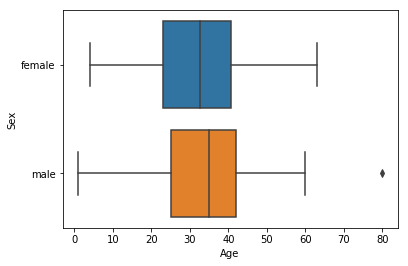

In [171]:
#age_surv=train[['Age'],['Survived']] #why does this not work??

train_drop=train.dropna()#drop all rows with NaN values
print(train_drop.shape) #HOW DO I SPECIFY WHICH COLUMNS TO LOOK AT
#train_drop.
survived_bool=train_drop['Survived']==1 #creates list of bools 
survived=train_drop[survived_bool] #this indexes them and removes the 'False'

survived_not_bool=train_drop['Survived']==0
survived_not=train_drop.loc[survived_not_bool, :]

#print(sns.distplot(train_drop['Age'])) #need to put side by side
#print(sns.distplot(survived_not['Age']))
#print(sns.distplot(survived['Age']))
sns.boxplot(data=survived, x="Age", y="Sex")


Facet Grid

C:\Users\pieria\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


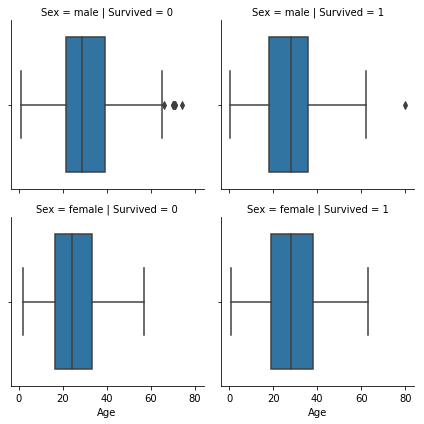

In [176]:
g = sns.FacetGrid(train, col='Survived',row='Sex')
#g.map(plt.hist, 'Age', bins=20)

#g = sns.FacetGrid(train, col='Survived')
g.map(sns.boxplot, 'Age')

## Correlation between discrete variables and survival rate

In [44]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [46]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [65]:
train.dropna()
print(train.head(7))
#sns.distplot(train['Age'])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN

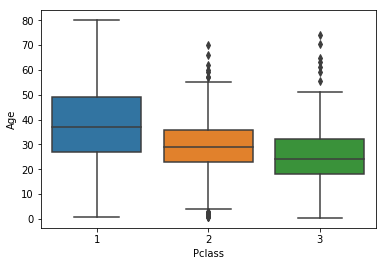

In [57]:

sns.boxplot(x='Pclass', y='Age', data=train)